

# Project:
##        Investigate a Dataset (TMDb Movie Data Analysis)

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I choose TMDB data for movies to analysis using pandas , numpy and matplot for the visualization , And answering these questions :

**What year has the highest release of movies ?**
**what movie has the most profit ?**
**what movie has the lowest profit?**
**what are top 5 movies has the highest Profits ?**
**what are the highest release number of movie by genres ?**
**what  are the highest number of movies by Director ?**


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html




import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

In this Phase , i will answer the questions based on the relevent data and exclude the rest of unnecessary data .

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


tmdb_df = pd.read_csv('tmdb-movies.csv')

# print first 10 records of the dataset 
tmdb_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [78]:
# This finction to get the summery of the dataset
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [79]:
# Generates descriptive statistics
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [80]:
# This Function is to see the sum of null values 
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [81]:
# Drop any duplicated data 

tmdb_df.drop_duplicates(inplace = True)
print(" Droping  the  Duplicate Values (Rows,Columns)",tmdb_df.shape)


 Droping  the  Duplicate Values (Rows,Columns) (10865, 21)


In [82]:
## Remove zero values from ( Budget and Revenue)

budget_revenue_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
tmdb_df[budget_revenue_list] = tmdb_df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
tmdb_df.dropna(subset = budget_revenue_list, inplace = True)

rows, col = tmdb_df.shape
print('After drop all zeros from  budgetrevenue ,the result is  {}  number of  movies.'.format(rows-1))

After drop all zeros from  budgetrevenue ,the result is  3853  number of  movies.


In [83]:
# Drop unnecessary data 

tmdb_df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Drop unnecessary Columns (Rows,Columns) : ",tmdb_df.shape)

Drop unnecessary Columns (Rows,Columns) :  (3854, 15)


In [84]:
# This Function for Changing the format of Release Date Into Datetime

tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What year has the highest release of movies . ?)

In [85]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


release_year
2011    199
2012    158
2013    180
2014    165
2015    160
Name: id, dtype: int64


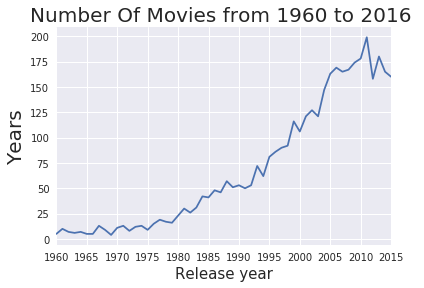

In [86]:
# Group by for each year and counting the number of all movies in each year
data=tmdb_df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
tmdb_df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sb.set(rc={'figure.figsize':(15,5)})
plt.title("Number Of Movies from 1960 to 2016 ",fontsize = 20)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Years',fontsize = 20)
#set the style sheet
sb.set_style("darkgrid")

##### From the graph we can analyse the highest number of releasing movies was in 2013 by approximately 700 movie

### (Research Question 2)  what movie has the most profit ?
### (Research Question 3)  what movie has the lowest profit?

In [87]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [88]:
#Add new column (Profit) in the dataset- calculation done by subtract the revenue from budget
tmdb_df['Profit'] = tmdb_df['revenue'] - tmdb_df['budget']

In [89]:
#idmin : to find the index of lowest profit movie.
#idmax : to find the index of Highest profit movie.


def cal_min_max(x):
    
    #idmin to find the of lowest profit movie.
    min_index = tmdb_df[x].idxmin() 
    
    #idmin to find the of Highest profit movie.
    high_index = tmdb_df[x].idxmax()
    
    
    high = pd.DataFrame(tmdb_df.loc[high_index,:])
    low = pd.DataFrame(tmdb_df.loc[min_index,:])
    
    # Print the output for Highest & Lowest profit of movies 
    
    print("The Highest "+ x + " : ",tmdb_df['original_title'][high_index])
    print("The Lowest "+ x + "  : ",tmdb_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

    #call cal_min_max function.
cal_min_max('Profit')

The Highest Profit :  Avatar
The Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


##### In above data we can analysis that the hight profit was made by "Avatar" movie whereas the lowest profit was made by The "Warrior's Way" movie

### (Research Question 4)  what are top 5 movies has the highest Profits?

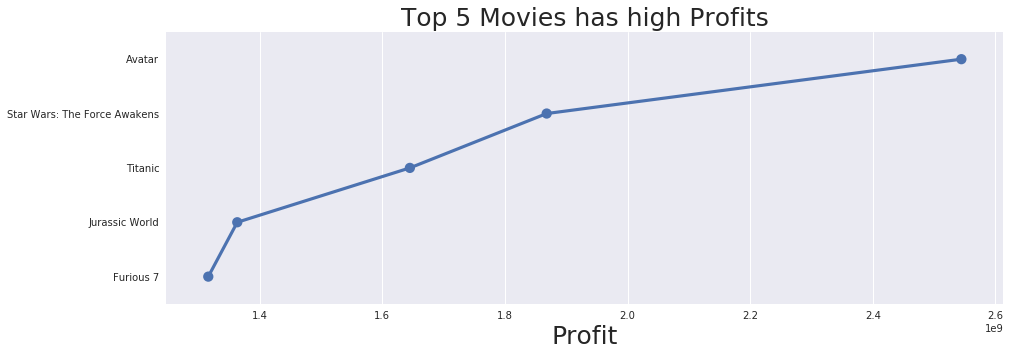

In [90]:


#sorting Profit in decending orders and store it in a new df
info = pd.DataFrame(tmdb_df['Profit'].sort_values(ascending = False))

info['original_title'] = tmdb_df['original_title']
data = list(map(str,(info['original_title'])))

x = list(data[:5])
y = list(info['Profit'][:5])

#using seaborn to get top highest  5 movies by profit
ax = sb.pointplot(x=y,y=x)

#size the graph
sb.set(rc={'figure.figsize':(10,5)})


#Title the graph
ax.set_title("Top 5 Movies has high Profits",fontsize = 25)
ax.set_xlabel("Profit",fontsize = 25)
sb.set_style("darkgrid")

### (Research Question 5)  what are the highest release number of movie by genres  ?


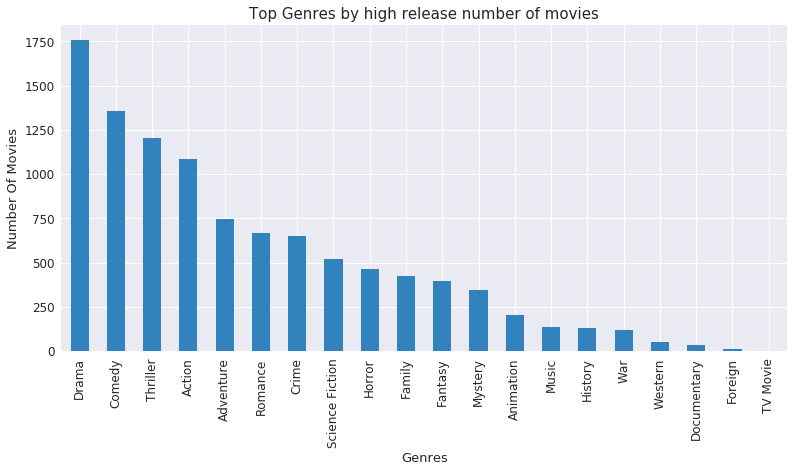

In [91]:
def count_genre(x):
    
#Split all  rows of genrs.
    
    data_plot = tmdb_df[x].str.cat(sep = '|')
    
    data = pd.Series(data_plot.split('|'))
    
#cont by each genre
    
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.

total_genre_movies = count_genre('genres')

#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')

#Plot the Chart
plt.title("Top Genres by high release number of movies",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sb.set_style("darkgrid")

##### In above graph , the highest  release number of movies by genre is Drama by 4800 movie then comedy 


### (Research Question 6)  what  are the highest number of movies by Director?


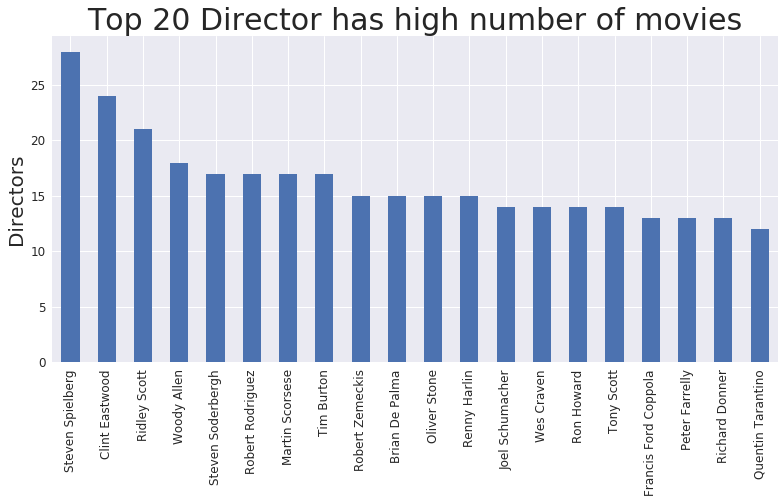

In [92]:
#count director by each movie .
count_director_movies = count_genre('director')

#Plot the Chart
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Top 20 Director has high number of movies",fontsize=30)
plt.ylabel("Directors",fontsize= 20)
sb.set_style("whitegrid")

##### In above graph , the highest  number of movies by director "Woody Allen"  

In [ ]:



# Using seaborn.regplot to plot data and a linear regression model for Revenue and Budget

plt_scatter = sb.regplot(x=tmdb_df['revenue'], y=tmdb_df['budget'],color='r')


#setup the title and the labels 

plt_scatter.set_title("Budget vs Revenue",fontsize=10)

plt_scatter.set_xlabel("Revenue",fontsize=10)

plt_scatter.set_ylabel("Budget",fontsize=10)



#Graph size configurations 
sb.set(rc={'figure.figsize':(7,6)})
sb.set_style("darkgrid")


#Using 'corr()' function to find correlation.

data_corr = tmdb_df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['revenue','budget'])

Correlation Between Revenue And Budget :  0.688556152464


##### In above graph , Budget and Revenue have positive correlation between these 2 variables , which means when the budget is high for movies than the revenue will increase

<a id='conclusions'></a>
## Conclusions


We can analysis that 2013 has the most release of movies was made by 700 movie .
The highest profit was  “Avatar” movie  by 2544505847  $ ,  whereases the lowest profit was    “The Warrior's Way” movie by -413912431
The top 5 movies has the highest profits are  : Avatar , Star Wars: The Force Awakens , Titanic , Jurassic World , Furious 7 respectively , the highest release number of movies by genre is Drama by 4800 movie then comedy , Director Woody Allen has the highest number of movies 



## Limitations:
###  Budget and Revenue column do not have currency unit , some columns need to split like Genres , a lot of data need to be parsing , Removing the rows with missing values will affect the final results .


In [6]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0